##  План

[Шаг 1. Открыть файл с данными и изучить общую информацию](#step1)

[Шаг 2. Подготовить данные](#step2)

[Шаг 3. Провести исследовательский анализ данных](#step3)

[Шаг 4. Составить портрет пользователя каждого региона](#step4)

[Шаг 5. Проверить гипотезы](#step5)

In [1]:
# Импорт нужных библиотек
import pandas as pd
import numpy as np

from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px

# Сразу добавлю фон к графикам от sns
sns.set(style="darkgrid")

# Шаг 1. Открываю файл с данными и изучаю общую информацию
<a id="step1"></a>  

In [2]:
# Загружу данные 
data = pd.read_csv('games.csv')
# Посмотрю общую информацию
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data['Rating'].value_counts() # Вывожу уникальные значения столбца с рейтингами 

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [4]:
data[data['Rating']=='K-A'] # Смотрю игры с рейтингом К-А

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
656,Theme Hospital,PC,1997.0,Strategy,2.30,0.10,0.00,0.00,NaN,9,K-A
903,PaRappa The Rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


Обозначения рейтингов:
- «`EC`» («Early childhood») — «Для детей младшего возраста»:
- «`E`» («Everyone») — «Для всех»
- «`E10+`» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «`T`» («Teen») — «Подросткам»
- «`M`» («Mature») — «Для взрослых»:
- «`AO`» («Adults Only 18+») — «Только для взрослых»
- «`RP`» («Rating Pending») — «Рейтинг ожидается»

Как видно из данных есть значение `K-A`. Скорее всего это устаревшее обозначение рейтинга или другая ассоциация. 
Всего `3` игры и они `1996-97г.`

In [5]:
data[data['Name'].isnull()] #Смотрю пропущенные значения в имени

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Из данных видно что здесь много пропусков в оценках и рейтинге. Возможно это связанно с выгрузкой данных из одной базы данных а не из нескольких. Из-за этого рейтинг мог пропасть или слететь. Возможно не ставили рейтинг т.к не успели оценить (может быть перезапуск игры на другой консоли или обновлённая версия игры). Так же есть пропуски в дате и не правильном формате (сейчас там `float`). Опять же возможно это из-за перевыпуска игры на другой платформе(ведь можно поиграть в старые игры на новых платформах). Так же сейчас часто делают временно эксклюзив игры т.е. какое то время в неё можно поиграть только на определённой платформе. Соответственно даты могут различатся. Так же есть 2 пропуска в названии и жанре игры. Это старые игры 1993г.

# Шаг 2. Подготовка данных
<a id="step2"></a>  

In [6]:
# Для начала удалю 2 строчки без названия и жанра игры. Это меньше 0.001 % 
data = data.dropna(subset = ['Name','Genre'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16713 non-null  object 
 2   Year_of_Release  16444 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   Other_sales      16713 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Во всех столбцах кроме оценки пользователей меня устраивает тип данных.В столбце год релиза тип данных `float` и есть пропущенные значения.
Из-за этого я не могу преобразовать их в целочисленные или в `datetime`.

В столбце user_score есть значение `tbd`. Это значит что пользователи еще не оценили её или же система не набрала нужное кол-во
отзывов для формирования оценки, поэтому я заменю на `NaN` и сделаю тип данных `float`.

In [7]:
# Изменил регист столбцов(привел к нижнему регистру)
data.columns = data.columns.str.lower()

data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.3       2
0.9       2
1.1       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [8]:
data['user_score'] = data['user_score'].replace('tbd', 'NaN').astype(float)

#Сделаю подсчет суммарных продаж во всех регионах и запишу их в отдельный столбец total_sales
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

#Выведу общую информацию
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Пропуски могут быть связаны с ошибкой при объединении данных или же такого критерия не было вообще в одной из баз. Пропуски в дате можно заполнить средним значение сгруппированным по платформе, но это может исказить данные из-за этого я оставлю как есть. То же самое можно было сделать и с оценками, но сгруппировав по жанру. Возможно пропуски в столбце `rating` из-за того что там по умолчанию рейтинг для всех т.е. «`E`»(Рейтинга E так же больше всего). Возможно что пропущенны значение еще из-за времени. Данные могут быть старыми или наоборот релиз только был.

# Шаг 3. Исследовательский анализ данных
<a id="step3"></a>  

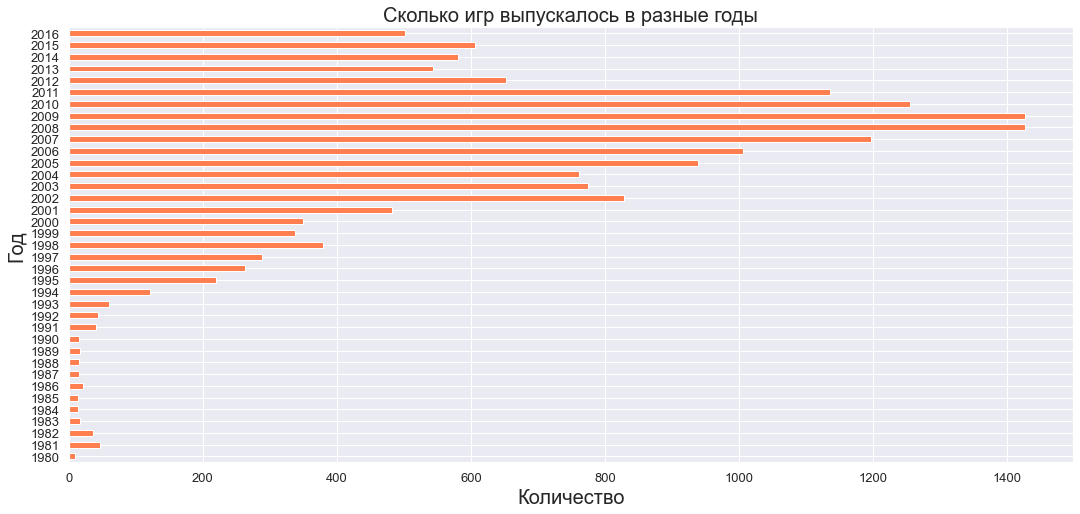

In [9]:
# Группирую по году и смотрю сколько игр выпускалось в разные годы
for_graphic_count = data.groupby('year_of_release').agg(count=('name','count'))

# Поменяю значения индекса с float на int чтобы год отображался без 0
for_graphic_count.index = for_graphic_count.index.astype(int)

# Cделаю график
for_graphic_count.plot(kind = 'barh',
                       figsize=(18,8),
                       legend=False,
                       fontsize=13,
                       color='coral')

plt.title('Cколько игр выпускалось в разные годы',fontsize=20)
plt.xlabel('Количество',fontsize=20)
plt.ylabel('Год',fontsize=20)
plt.show()

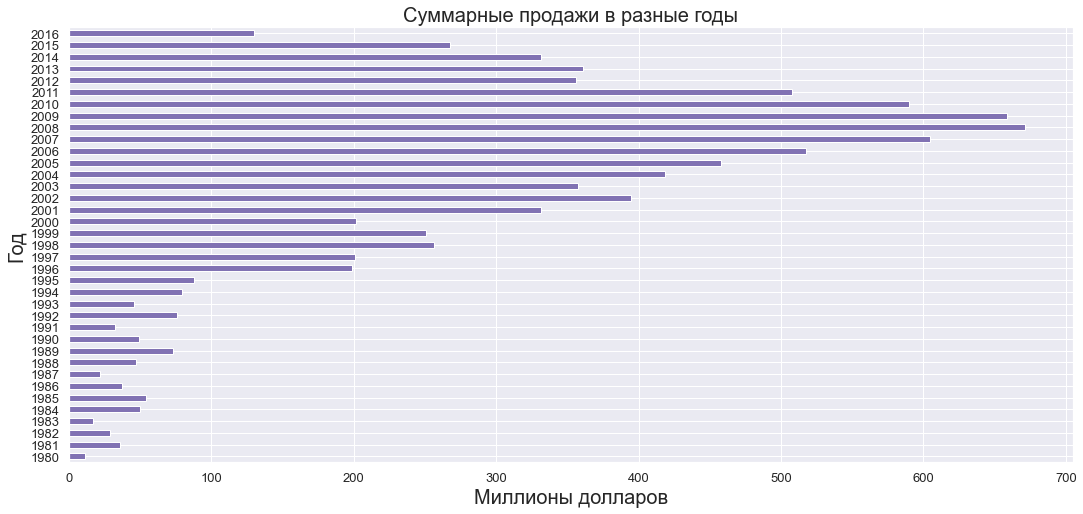

In [10]:
# Группирую по году и смотрю суммарные продажи в разные годы
for_graphic_sum = data.groupby('year_of_release').agg(total=('total_sales','sum'))

#Здесь сделаю тоже самое
for_graphic_sum.index = for_graphic_sum.index.astype(int)

# Cделаю график
for_graphic_sum.plot(kind = 'barh',
                     figsize=(18,8)
                     ,legend=False,
                     fontsize=13,
                     color='m')

plt.title('Суммарные продажи в разные годы',fontsize=20)
plt.xlabel('Миллионы долларов',fontsize=20)
plt.ylabel('Год',fontsize=20)
plt.show()

Видно что до 1995г. игр выходило очень мало(Всего 486). Так же видно пик в 2008-2009г. а после стало выходить меньше. Возможно это связано с тем что на разработку и выпуск игр стало уходить больше времени. Техническая сторона игр стала более сложной и требовательной. Я Думаю данные важны за весь период т.к рв разное время были разные платформы. Видно из графиков что есть тенденция что чем больше игр чем больше и доходы от них, но это может быть связанно и с выходом новых платформ или качества отдельных игр.

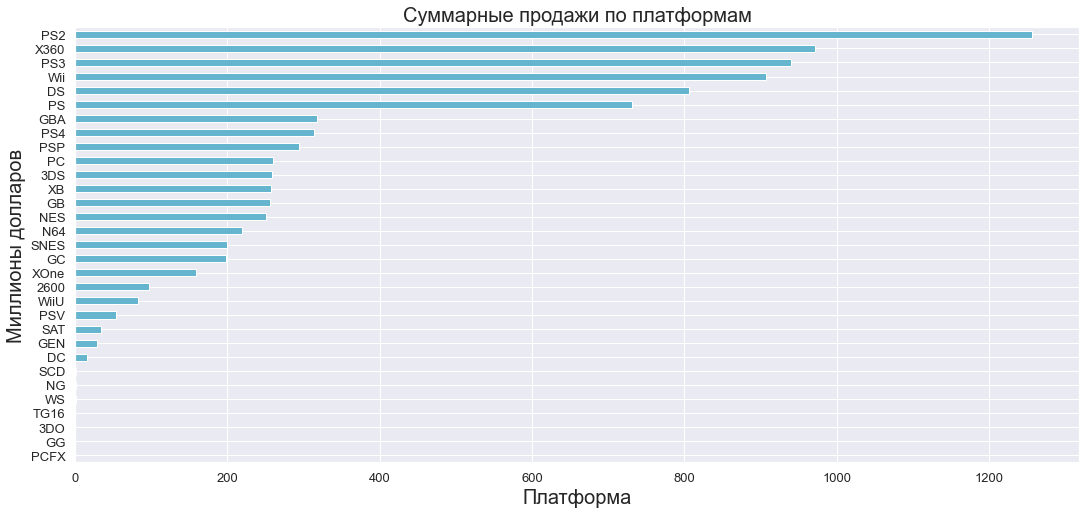

In [11]:
# Продажи по платформам за всё время
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').\
                             sort_values('total_sales').\
                             plot(kind='barh',figsize=(18,8),legend=False,fontsize=13,color='c')

plt.title('Суммарные продажи по платформам',fontsize=20)
plt.xlabel('Платформа',fontsize=20)
plt.ylabel('Миллионы долларов',fontsize=20)
plt.show()

In [12]:
# Выделил платформы на которых суммарные продажи больше 300млн. Их 8
total_more_300 = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').query('total_sales > 300')
total_more_300.sort_values('total_sales',ascending=False)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14


In [13]:
# Делаю новый дф только с платформами по продажам больше 300 млн. и сбрасиваю индекс. Называю дф топ
top = data.query('platform in @total_more_300.index').reset_index()

top['year_of_release'] = pd.to_numeric(top['year_of_release'],errors='coerce')

top  # тут 63% всех данных.

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10631,16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
10632,16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
10633,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
10634,16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


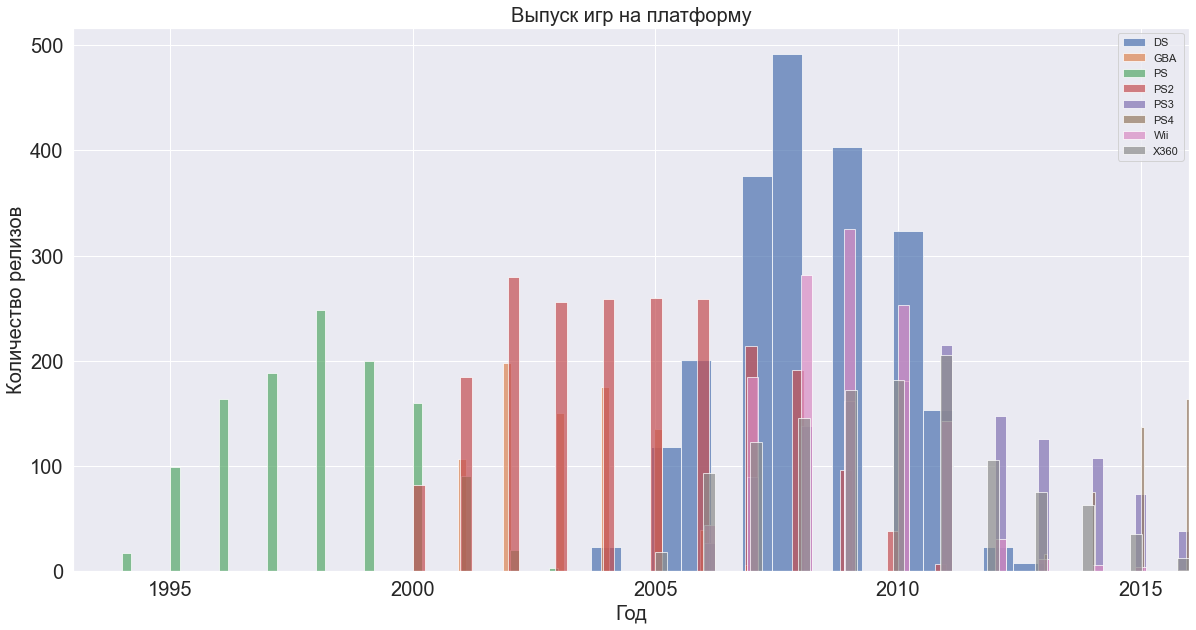

In [14]:
# Делаю график топ платформ
top.groupby('platform')['year_of_release'].plot(kind='hist',figsize=(20,10),legend=True,alpha=.7,bins=45,fontsize=20)

plt.title('Выпуск игр на платформу',fontsize=20)
plt.xlabel('Год',fontsize=20)
plt.ylabel('Количество релизов',fontsize=20)
plt.xlim(1993,2016) # Поставил с 1993 потому что до этого года нет данных, а график менее удобный.
plt.show()

Теперь сделаю такой же график но с помощью `bar`и `stacked`

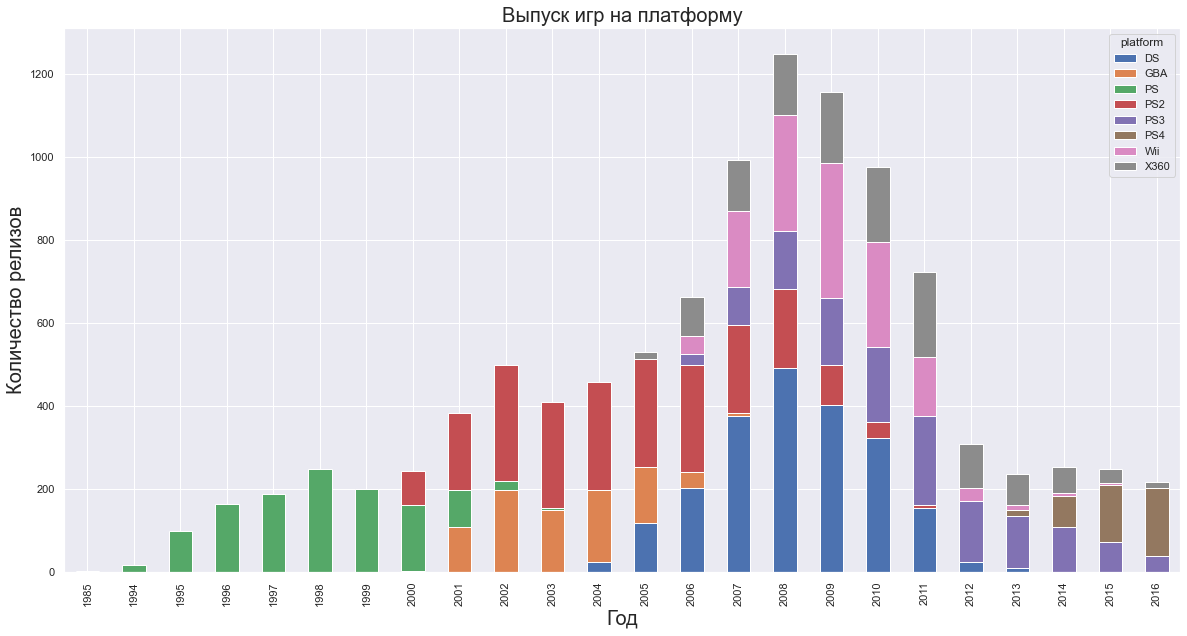

In [15]:
# Делаю график топ платформ. Для этого сделаю сводную таблицу
for_bar = top.pivot_table(index = 'year_of_release',columns = 'platform',values = 'name', aggfunc = 'count')

for_bar.index = for_bar.index.astype(int) # Переделаю индекс в int из float 

for_bar.plot(kind='bar',stacked=True,figsize=(20,10)) # График

plt.title('Выпуск игр на платформу',fontsize=20)
plt.xlabel('Год',fontsize=20)
plt.ylabel('Количество релизов',fontsize=20)
plt.show()

In [16]:
# Так же вывел платформы которые заработали больше 100 но меньше 300 млн.
total_less_300_and_more_100 = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').\
                                                        query('total_sales < 300 & total_sales > 100')

total_less_300_and_more_100.sort_values('total_sales',ascending=False)

,total_sales
platform,
PSP,294.05
PC,259.52
3DS,259.00
XB,257.74
GB,255.46
NES,251.05
N64,218.68
SNES,200.04
GC,198.93


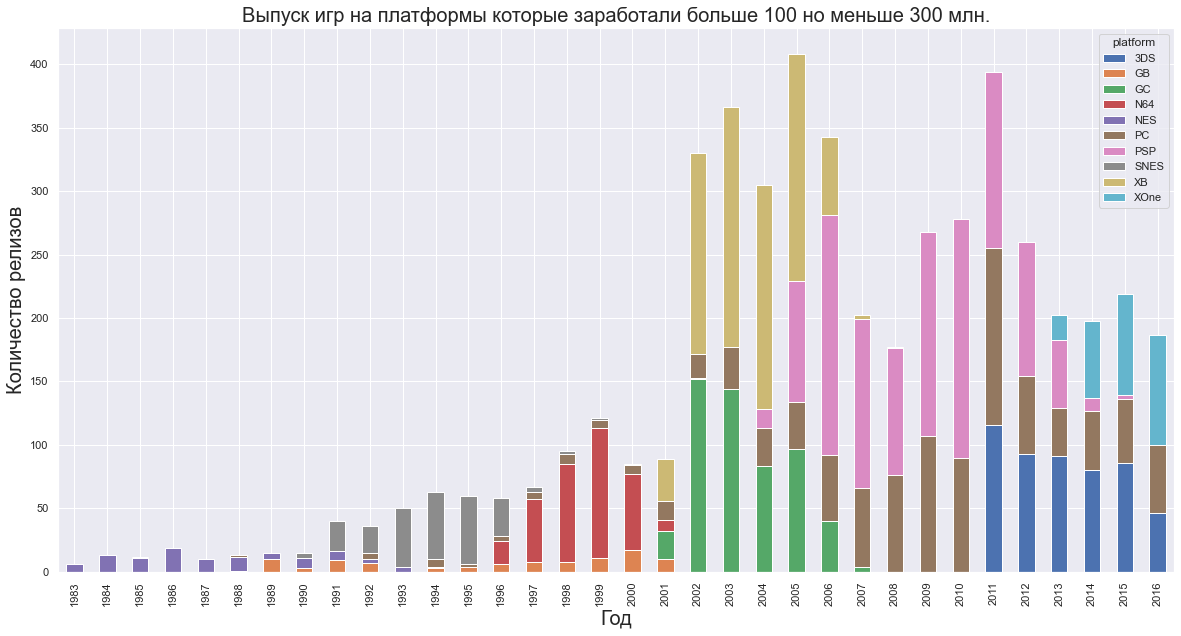

In [17]:
middle_sales = data.query('platform in @total_less_300_and_more_100.index').reset_index()

# Делаю график middle платформ. Для этого сделаю сводную таблицу
for_bar = middle_sales.pivot_table(index = 'year_of_release',columns = 'platform',values = 'name', aggfunc = 'count')

for_bar.index = for_bar.index.astype(int) # Переделаю индекс в int из float 

for_bar.plot(kind='bar',stacked=True,figsize=(20,10)) # График

plt.title('Выпуск игр на платформы которые заработали больше 100 но меньше 300 млн.',fontsize=20)
plt.xlabel('Год',fontsize=20)
plt.ylabel('Количество релизов',fontsize=20)
plt.show()

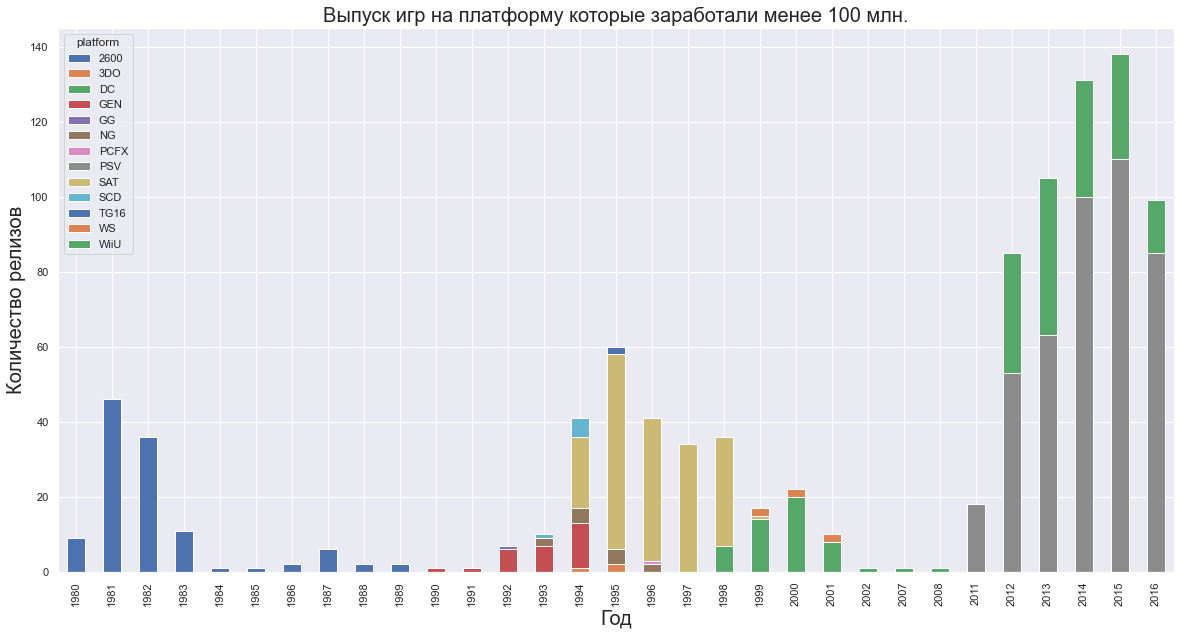

In [18]:
# Так же вывел платформы которые не заработали больше 100 млн.
total_less_100 = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').query('total_sales <100')

not_top = data.query('platform in @total_less_100.index').reset_index()

# Делаю график платформ которые не заработали больше 100 млн.
for_bar = not_top.pivot_table(index = 'year_of_release',columns = 'platform',values = 'name', aggfunc = 'count')

for_bar.index = for_bar.index.astype(int) # Переделаю индекс в int из float 

for_bar.plot(kind='bar',stacked=True,figsize=(20,10)) # График

plt.title('Выпуск игр на платформу которые заработали менее 100 млн.',fontsize=20)
plt.xlabel('Год',fontsize=20)
plt.ylabel('Количество релизов',fontsize=20)
plt.show()

Тут видно что платформа примерно изчезает за 7-10 лет и пик приходится на 4-5г. её появления вне зависимости от прибыли. Появление новой платформы характерно через 5-7 лет. Так же видно что `XOne` во 2 графике и `PS4` в первом еще не вышли на пик и возможно они потенциально популярные продукты и спланировать рекламные кампании стоит в их сторону. Так же стоит учесть прошлые консоли этих платформ(они в топе) и не стоит забывать о PC т.к он идёт стабильно и уже на рынке более 15 лет. При том что остальные изчезают через 7-10 лет. Так что актуальный период я считаю начиная с 2011г.(т.к информация за 2016 у нас не полная)

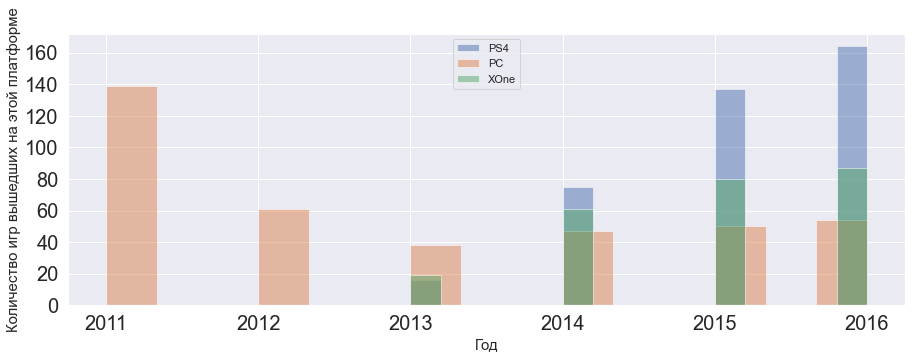

In [19]:
actual_period = data.query('year_of_release >= 2011')
actual_period # Тут 24% от всех данных

actual_period.query('platform == "PS4"')['year_of_release'].plot(kind='hist',figsize=(15,5),legend=True,alpha=.5,bins=15,fontsize=20,label='PS4')
actual_period.query('platform == "PC"')['year_of_release'].plot(kind='hist',figsize=(15,5),legend=True,alpha=.5,bins=15,fontsize=20,label='PC')
actual_period.query('platform == "XOne"')['year_of_release'].plot(kind='hist',figsize=(15,5),legend=True,alpha=.5,bins=15,fontsize=20,label='XOne')
plt.xlabel('Год',fontsize=15)
plt.ylabel('Количество игр вышедших на этой платформе',fontsize=15)
plt.show()

In [20]:
# Смотрю на самые продаваемые игры на всех платформах и какого они года.
actual_period.pivot_table(index=['name','year_of_release'],values = 'total_sales', aggfunc='sum').sort_values('total_sales',ascending=False).head()

,,total_sales
name,year_of_release,
Grand Theft Auto V,2013.0,37.32
Call of Duty: Modern Warfare 3,2011.0,30.60
Call of Duty: Black Ops II,2012.0,29.40
Call of Duty: Ghosts,2013.0,27.39
Call of Duty: Black Ops 3,2015.0,25.67


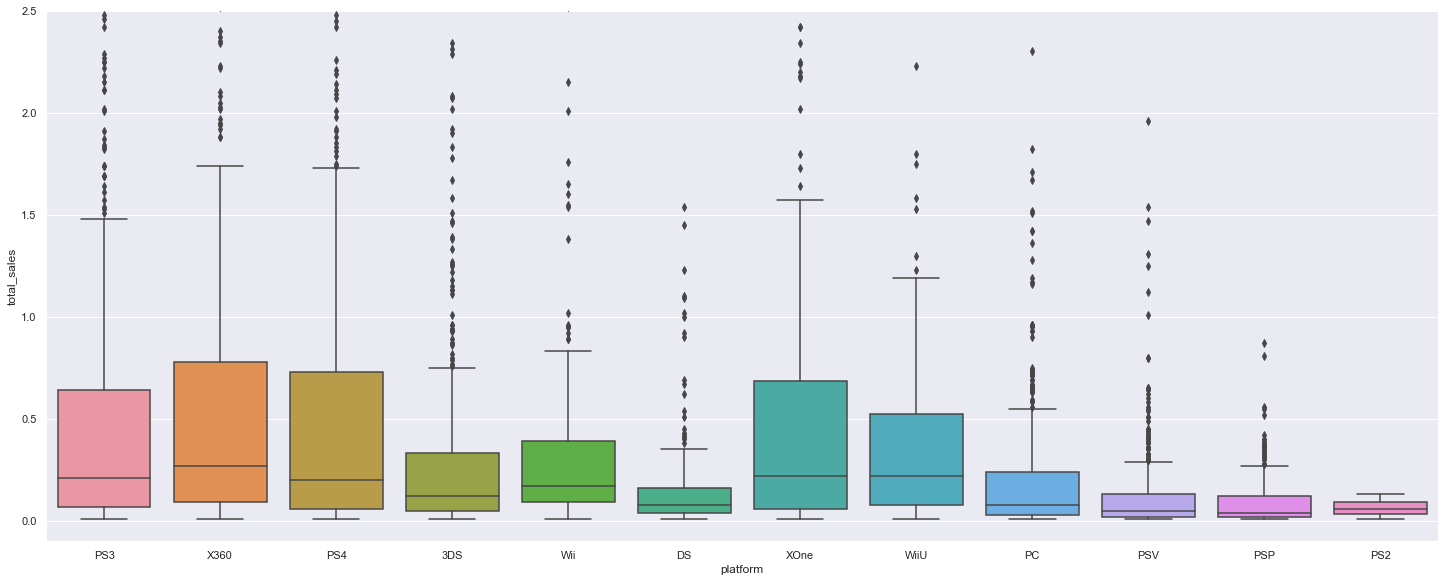

In [21]:
#Ящик с усами по глобальным продажам каждой игры и разбивкой по платформам.
sns.catplot(x='platform', y='total_sales', kind='box', data=actual_period, height = 8, aspect = 2.5)
sns.catplot = plt.ylim(-.1,2.5)

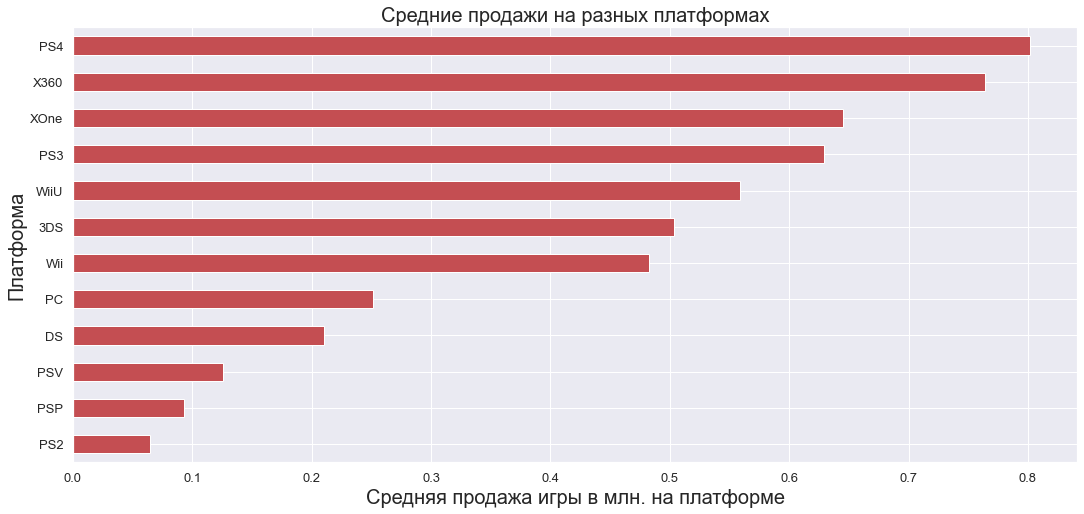

In [22]:
actual_period.pivot_table(index='platform',values = 'total_sales').sort_values('total_sales').\
                            plot(kind='barh',figsize=(18,8),legend=False,fontsize=13,color='r')

plt.title('Средние продажи на разных платформах',fontsize=20)
plt.ylabel('Платформа',fontsize=20)
plt.xlabel('Cредняя продажа игры в млн. на платформе',fontsize=20)
plt.show()

На ящике с усами видно выбросы. Это игры, которые продавались очень хорошо. Видно как `Grand Theft Auto V` собрала почти в 2 раза больше чем игра которая на 2‑м месте, а эта разница составляет почти 30 млн. Так же видно что она еще "свежая"(вышла в 2013г.) так же стоит обратить внимание на `Call of Duty: Black Ops 3` она 2015г. и собрала уже 25 млн. Видно что на `РS4` и `Х360` самые большие средние продажи, но исходя из графиков пик `Х360` уже прошёл и стоит делать упор на платформы нового поколения `XOne` и `РS4`.

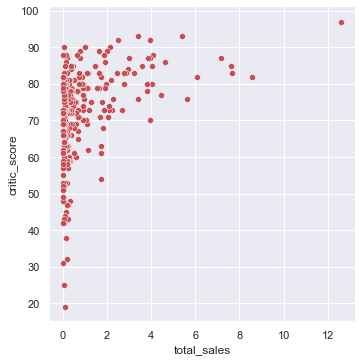

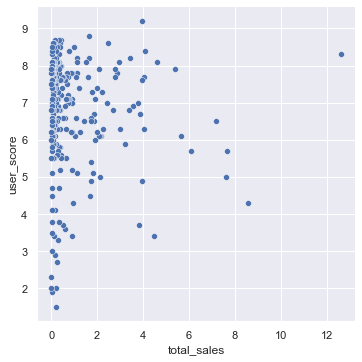

In [23]:
# Возьму самую актуальную платформу PS4 и посмотрю как влияют на продажи отзывы пользователей и критиков
data_ps4 = actual_period.query('platform == "PS4"')

# Видно что у нас не заполнены все значенияя в оценках пользователей и критиков. Так что данные могут быть не точными

# Построю диаграммы рассеяния
sns.relplot(y='critic_score', x="total_sales", data=data_ps4,color="r")
sns.relplot(y='user_score', x="total_sales", data=data_ps4)
plt.show()

In [24]:
# Корреляция оценок к продажам игр на пс4
data_ps4[['critic_score','user_score','total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


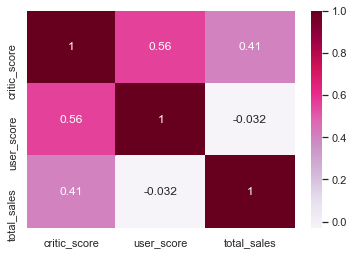

In [25]:
sns.heatmap(
    data_ps4[['critic_score','user_score','total_sales']].corr(),
    annot=True,
    cmap="PuRd")

plt.show()

Как видно из данных покупатели прислушиваются к оценкам критиков, и если они оценивают игру хорошо то покупатель может её купить. Видна положительная корреляция, а вот на оценки пользователей никто не смотрит. Так же видно положительную корреляцию между оценками пользователей и критиков что может говорить что они оценивают примерно одинаково. На других платформах такая же положительная корреляция но чуть меньше. Это может быть связано с пропусками в оценках.

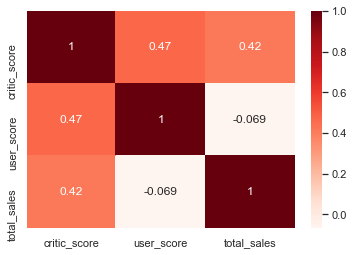

In [26]:
# Корреляция оценок к продажам игр на XOne
sns.heatmap(
    actual_period[actual_period['platform']=='XOne'][['critic_score','user_score','total_sales']].corr(),
    annot=True,
    cmap="Reds")

plt.show()

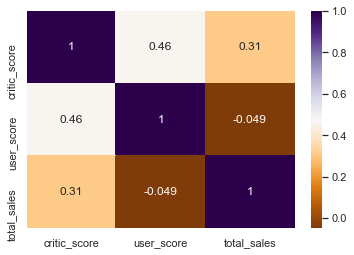

In [27]:
# Корреляция оценок к продажам игр на PC
sns.heatmap(
    actual_period[actual_period['platform']=='PC'][['critic_score','user_score','total_sales']].corr(),
    annot=True,
    cmap="PuOr")

plt.show()

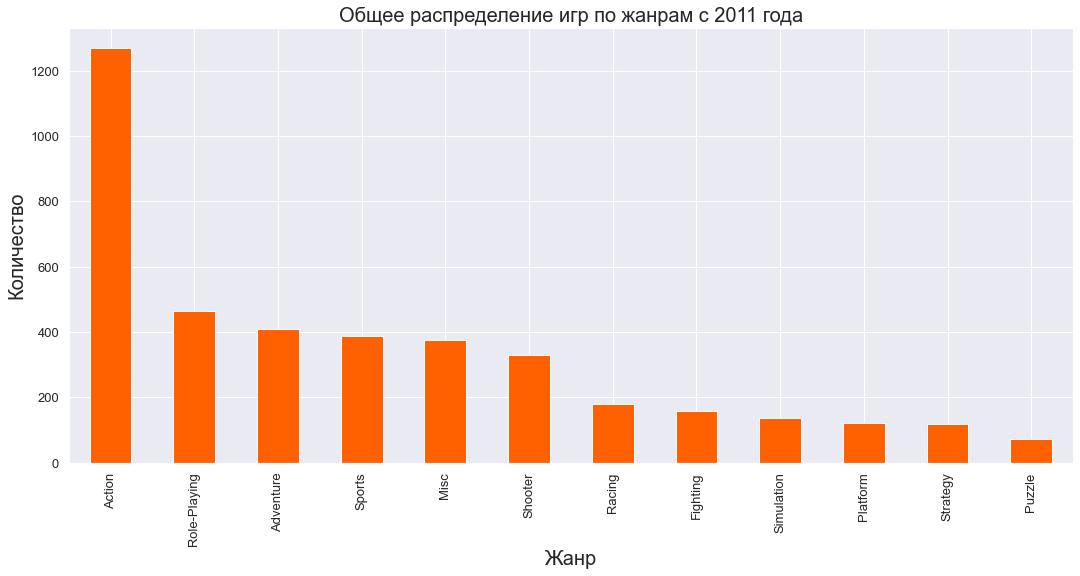

In [28]:
# Oбщее распределение игр по жанрам c 2011.
actual_period.pivot_table(index='genre',values = 'name', aggfunc='count').\
    sort_values('name', ascending=False).\
        plot(kind='bar',figsize=(18,8),legend=False,fontsize=13, color='#ff6000')

plt.title('Oбщее распределение игр по жанрам c 2011 года',fontsize=20)
plt.xlabel('Жанр',fontsize=20)
plt.ylabel('Количество',fontsize=20)
plt.show()

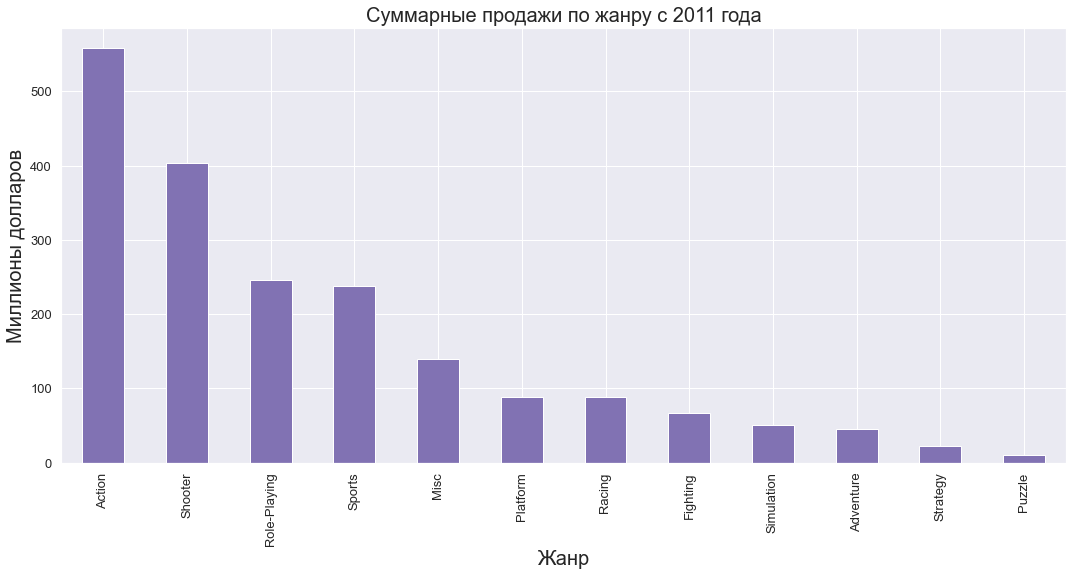

In [29]:
# Суммарные продажи по жанру с 2011 года
actual_period.pivot_table(index='genre',values = 'total_sales', aggfunc='sum')\
    .sort_values('total_sales', ascending=False).\
        plot(kind='bar',figsize=(18,8),legend=False,fontsize=13, color='m')

plt.title('Суммарные продажи по жанру с 2011 года',fontsize=20)
plt.xlabel('Жанр',fontsize=20)
plt.ylabel('Миллионы долларов',fontsize=20)
plt.show()

Больше всего игр выпускают в жанре `Action`. Возможно из-за этого этот жан и приносит больше всего денег. `Shooter` производят на много меньше но продажи у них идут хорошо. А вот `Adventure` выпускают больше чем `Shooter` а продажи у них хуже. Это может быть связанно с масштабом игры(возможно это маленькая игра с маленькой ценой). Очень маленький доход и выпуск жанров `Strategy` и `Puzzle`.

# Шаг 4. Портрет пользователя каждого региона
<a id="step4"></a>  

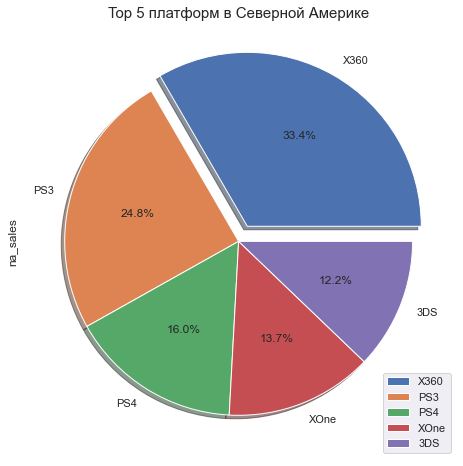

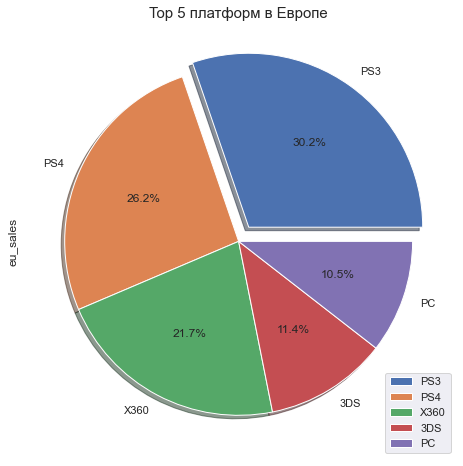

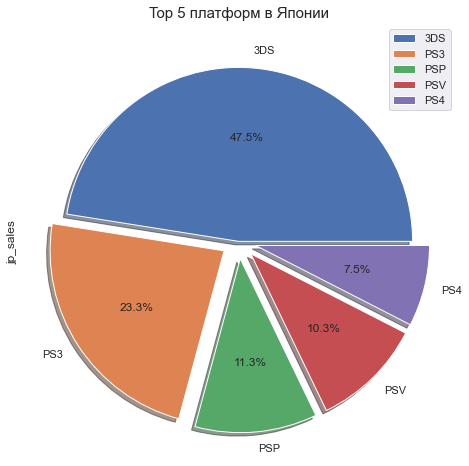

In [30]:
# Строю круговые диаграммы для топ 5 платформ в разных регионах
actual_period.pivot_table(index='platform', values='na_sales',aggfunc='sum').sort_values('na_sales',ascending=False).head().\
plot.pie(subplots=True,figsize=(20, 8),autopct='%1.1f%%',shadow=True, explode=(0.1, 0, 0, 0, 0))
plt.title('Top 5 платформ в Северной Америке',fontsize=15)
plt.show()

actual_period.pivot_table(index='platform', values='eu_sales',aggfunc='sum').sort_values('eu_sales',ascending=False).head().\
plot.pie(subplots=True,figsize=(20, 8),autopct='%1.1f%%',shadow=True, explode=(0.1, 0, 0, 0, 0))
plt.title('Top 5 платформ в Европе',fontsize=15)
plt.show()

actual_period.pivot_table(index='platform', values='jp_sales',aggfunc='sum').sort_values('jp_sales',ascending=False).head().\
plot.pie(subplots=True,figsize=(20, 8),autopct='%1.1f%%',shadow=True, explode=(0, 0.1, 0.1, .1, 0.1))
plt.title('Top 5 платформ в Японии',fontsize=15)
plt.show() 

В Северной Америке предпочитают `Xbox` а вот в Европе больше любят `PS`. В Японии же больше любят портативные платформы и больше всего там предпочитают `3DS`. Кроме Европы `PC` больше нигде не входит в топ 5.

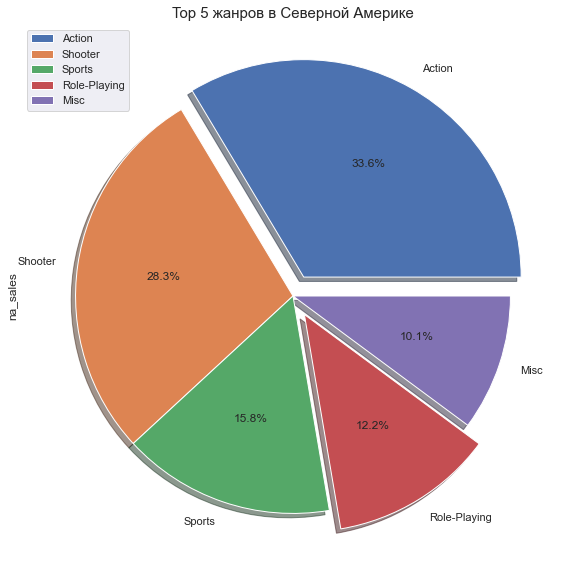

,na_sales
genre,
Action,230.92
Shooter,194.43
Sports,108.70
Role-Playing,83.78
Misc,69.69


In [31]:
# Строю круговые диаграммы для топ 5 жанров в разных регионах
actual_period.pivot_table(index='genre', values='na_sales',aggfunc='sum').sort_values('na_sales',ascending=False).head().\
plot.pie(subplots=True,figsize=(20, 10),autopct='%1.1f%%',shadow=True, explode=(0.1, 0, 0, 0.1, 0))
plt.title('Top 5 жанров в Северной Америке',fontsize=15)
plt.show()

actual_period.pivot_table(index='genre', values='na_sales',aggfunc='sum').sort_values('na_sales',ascending=False).head()

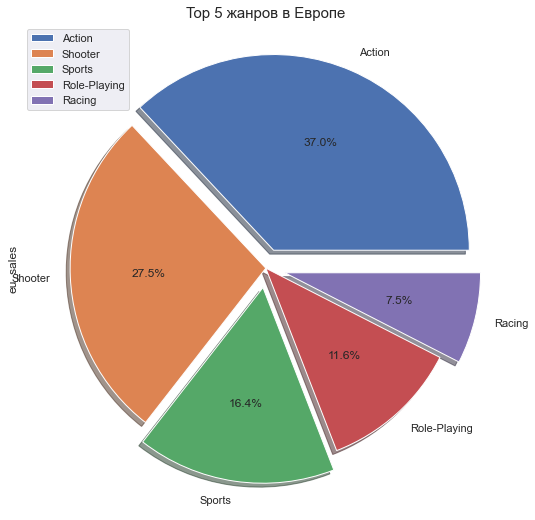

,eu_sales
genre,
Action,199.12
Shooter,148.02
Sports,88.48
Role-Playing,62.30
Racing,40.58


In [32]:
actual_period.pivot_table(index='genre', values='eu_sales',aggfunc='sum').sort_values('eu_sales',ascending=False).head().\
plot.pie(subplots=True,figsize=(20, 9),autopct='%1.1f%%',shadow=True, explode=(0.1, 0, 0.1, 0, 0.1))
plt.title('Top 5 жанров в Европе',fontsize=15)
plt.show()

actual_period.pivot_table(index='genre', values='eu_sales',aggfunc='sum').sort_values('eu_sales',ascending=False).head()

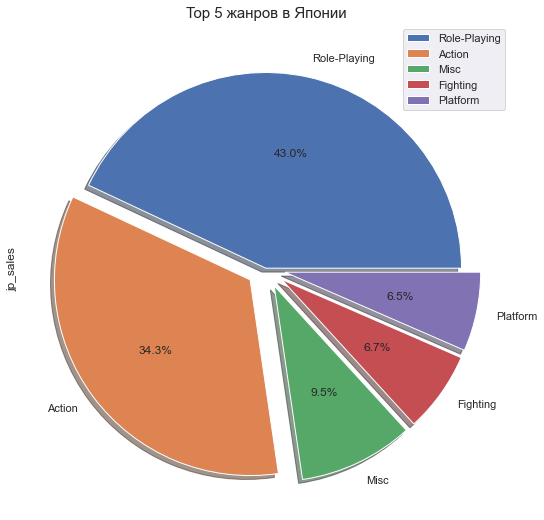

,jp_sales
genre,
Role-Playing,79.87
Action,63.62
Misc,17.60
Fighting,12.38
Platform,12.13


In [33]:
actual_period.pivot_table(index='genre', values='jp_sales',aggfunc='sum').sort_values('jp_sales',ascending=False).head().\
plot.pie(subplots=True,figsize=(20, 9),autopct='%1.1f%%',shadow=True, explode=(0, 0.1, 0.1, .1, 0.1))
plt.title('Top 5 жанров в Японии',fontsize=15)
plt.show() 

actual_period.pivot_table(index='genre', values='jp_sales',aggfunc='sum').sort_values('jp_sales',ascending=False).head()

В Европе и Северной Америке жанры топ 5 почти не отличаются только 5-м местом. Прибыль от игр в Северной Америки выше чем в Европе. А вот в Японии любят больше всего жанр `Role-Playing` и `Action`(эти два жанра занимают более 75%) но рынок не такой доходный как в других регионах.

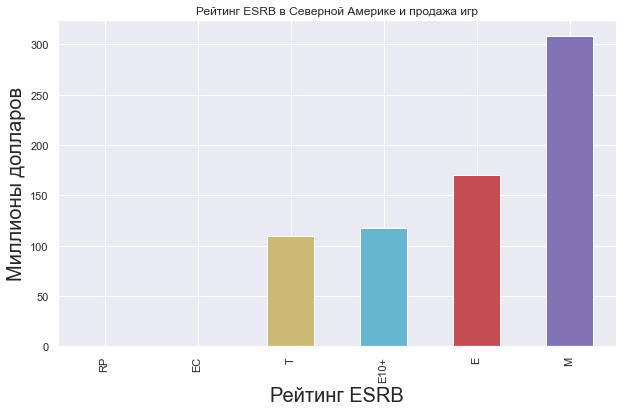

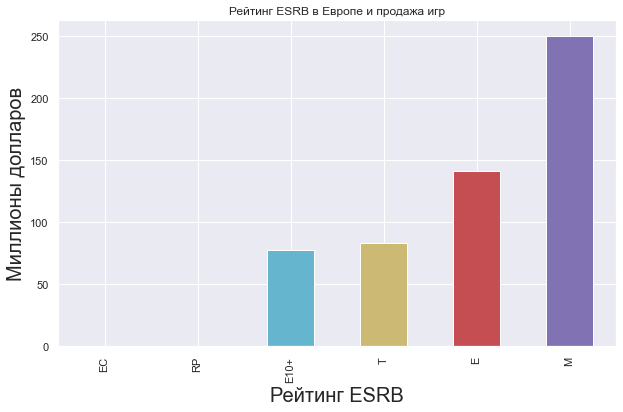

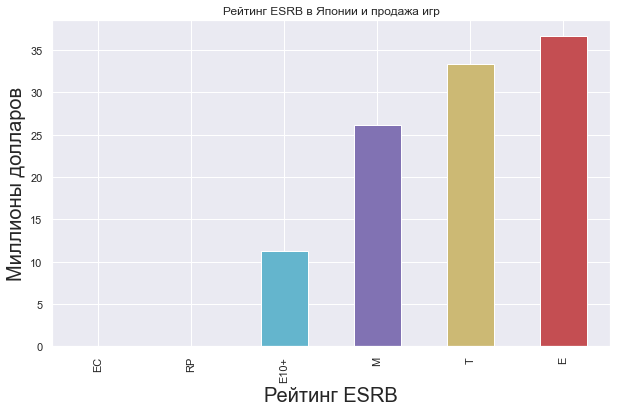

In [34]:
# Возьму самый прибыльный регион
actual_period.groupby('rating')['na_sales'].sum().sort_values().plot(kind = 'bar',figsize=(10,6),color=['r','m','y','c'])
plt.title('Рейтинг ESRB в Северной Америке и продажа игр')
plt.xlabel('Рейтинг ESRB',fontsize=20)
plt.ylabel('Миллионы долларов',fontsize=20)
plt.show()

actual_period.groupby('rating')['eu_sales'].sum().sort_values().plot(kind = 'bar',figsize=(10,6),color=['r','m','c','y'])
plt.title('Рейтинг ESRB в Европе и продажа игр')
plt.xlabel('Рейтинг ESRB',fontsize=20)
plt.ylabel('Миллионы долларов',fontsize=20)
plt.show()

actual_period.groupby('rating')['jp_sales'].sum().sort_values().plot(kind = 'bar',figsize=(10,6),color=['y','r','c','m'])
plt.title('Рейтинг ESRB в Японии и продажа игр')
plt.xlabel('Рейтинг ESRB',fontsize=20)
plt.ylabel('Миллионы долларов',fontsize=20)
plt.show()


Обозначения рейтингов 
- «EC» («Early childhood») — «Для детей младшего возраста»:
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»:
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

Из графиков видно что в Северной Америки и Европе больше продается игр с рейтингом «M» — «Для взрослых». Можно предположить что там более взрослая аудитория и из-за этого там такие большие продажи т.к люди могут себе позволить покупать игры. В Японии же рейтинг «E» — «Для всех» . Думаю это связанно с тем что там играют много детей и они не могут купить себе все игры которые они хотят в связи с этом там продажи ниже.

# Шаг 5. Проверка гипотез
<a id="step5"></a>  

In [35]:
#Нулевая гипотеза(H₀): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

# Данные пользовательского рейтинга игр на платформе XOne 
user_score_in_xone = actual_period.query('platform=="XOne"')['user_score'] # 27% данных без оценок пользователей
np.var(user_score_in_xone) # 1.8965188383045526 значение дисперсии

# Данные пользовательского рейтинга игр на платформе РС 
user_score_in_pc = actual_period.query('platform=="PC"')['user_score'] # 21% данных без оценок пользователей
np.var(user_score_in_pc) # 2.5878388099608487 значение дисперсии

alpha = .05 #значение альфа 5%

results = st.ttest_ind(user_score_in_xone, user_score_in_pc, equal_var=False) #т.к дисперсии не равны  

print('Средняя оценка пользователя платформы Xone {:.2f}'.format(user_score_in_xone.mean()))
print('Средняя оценка пользователя платформы PC {:.2f}'.format(user_score_in_pc.mean()))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя оценка пользователя платформы Xone 6.52
Средняя оценка пользователя платформы PC 6.45
Не получилось отвергнуть нулевую гипотезу


In [36]:
#Нулевая гипотеза(H₀): Средние пользовательские рейтинги жанров Action и Sports равны.

# Данные пользовательского рейтинга жанра Action
user_score_in_action = actual_period.query('genre=="Action"')['user_score'] # 48% данных без оценок пользователей
np.var(user_score_in_action) # 1.8965188383045526 значение дисперсии

# Данные пользовательского рейтинга жанра Sports
user_score_in_sports = actual_period.query('genre=="Sports"')['user_score'] # 37% данных без оценок пользователей
np.var(user_score_in_sports) # 2.87079202194461 значение дисперсии

alpha = .05 # значение альфа 5%

results = st.ttest_ind(user_score_in_action, user_score_in_sports, equal_var=False) #т.к дисперсии не равны  

print('Средняя оценка пользователя жанра Action {:.2f}'.format(user_score_in_action.mean()))
print('Средняя оценка пользователя жанра Sports {:.2f}'.format(user_score_in_sports.mean()))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя оценка пользователя жанра Action 6.78
Средняя оценка пользователя жанра Sports 5.65
Не получилось отвергнуть нулевую гипотезу


Ни одну из гипотез не получилось отвергнуть. Возможно если бы у нас было больше данных результат был бы другим т.к среднее по жанру различаются.

# Вывод

Популярность продукта может зависеть от многих факторов:
- Япония. Тут лучше делать ставку на портативные платформы. Рейтинг же игр лучше `E(для всех)` и `Т(подростки)`. Жанр игры `Role-Playing` или `Action`. Опять же рынок не самый прибыльный и лучше сконцентрироваться на более выгодных регионах.
***
- Северная Америка. Тут большое предпочтение идет платформе `Xbox` но и на PS последних поколений можно обратить внимание. Рейтинг игр лучше `M(Для взрослых)` и можно на `E(для всех)`. Жанры в этом регионе лучше всего `Action` и `Shooter`.
***
- Европа. Тут лучше `PS4`. Продажи на `Xbox` здесь хуже. Можно обратить внимание на `PC` т.к он более стабилен и не устаревает, правда и продажи на нём меньше. Рейтинг игр лучше `M(Для взрослых)` и можно на `E(для всех)`.Жанры в этом регионе лучше всего `Action` и `Shooter`.
***
Так же во всех регионах есть положительная корреляция к оценкам критиков. Их тоже нужно учитывать. На оценки пользователей можно не акцентировать внимание.